In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from matplotlib.colors import LinearSegmentedColormap
colormap = plt.colormaps['tab20']


In [35]:
%%time
# Flights from Apr 16 to May 23

subfolders = [f.path for f in os.scandir('data/waterloo/on-call/charging') if f.is_dir()] #Scans Directory
total_subfolders = len(subfolders)



df_time_list = []
df_alt_list = []
df_bat1C_list = []
df_bat2C_list = []
df_bat1V_list = []
df_bat2V_list = []
df_bat1A_list = []
df_bat2A_list = []
df_soc_list = []
df_oat_list = []

# Iterates and read each csv
for i, subfolder in enumerate(subfolders):
    csv_files = glob.glob(os.path.join(subfolder, '*.csv'))
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True) #Status Print
    if csv_files:
        # Reads the first csv file in each flight folder
        main_csv = csv_files[0]
        with open(main_csv) as f:
            total_rows = sum(1 for line in f)
        # Skips every 10 rows for efficiency (1 sec iterations estimate)
        skip_rows = [i for i in range(1, total_rows) if i % 10 != 0]
    df_csv = pd.read_csv(main_csv,skiprows=skip_rows)
    df_time_list.append(df_csv[" time(min)"])
    df_bat1C_list.append(df_csv[" bat 1 soc"])
    df_bat2C_list.append(df_csv[" bat 2 soc"])
    df_bat1V_list.append(df_csv[" bat 1 voltage"])
    df_bat2V_list.append(df_csv[" bat 2 voltage"])
    df_bat1A_list.append(df_csv[" bat 1 current"])
    df_bat2A_list.append(df_csv[" bat 2 current"])
    df_oat_list.append(df_csv[" OAT"])
    
    

    
# Main df
df_power = pd.DataFrame({"time": df_time_list, "bat1C": df_bat1C_list, "bat2C": df_bat2C_list, "bat1V": df_bat1V_list, "bat2V": df_bat2V_list, "bat1A": df_bat1A_list, "bat2A": df_bat2A_list,"oat": df_oat_list})

df_soh1 = pd.DataFrame({"bat1": soh_list1})
df_soh2 = pd.DataFrame({"bat2": soh_list2})

print('') 

Processing file data/waterloo/on-call/charging\csv-26397-6378 [100%]
CPU times: total: 188 ms
Wall time: 682 ms


Processing file data/waterloo/on-call/charging\csv-26397-6378 [100%]

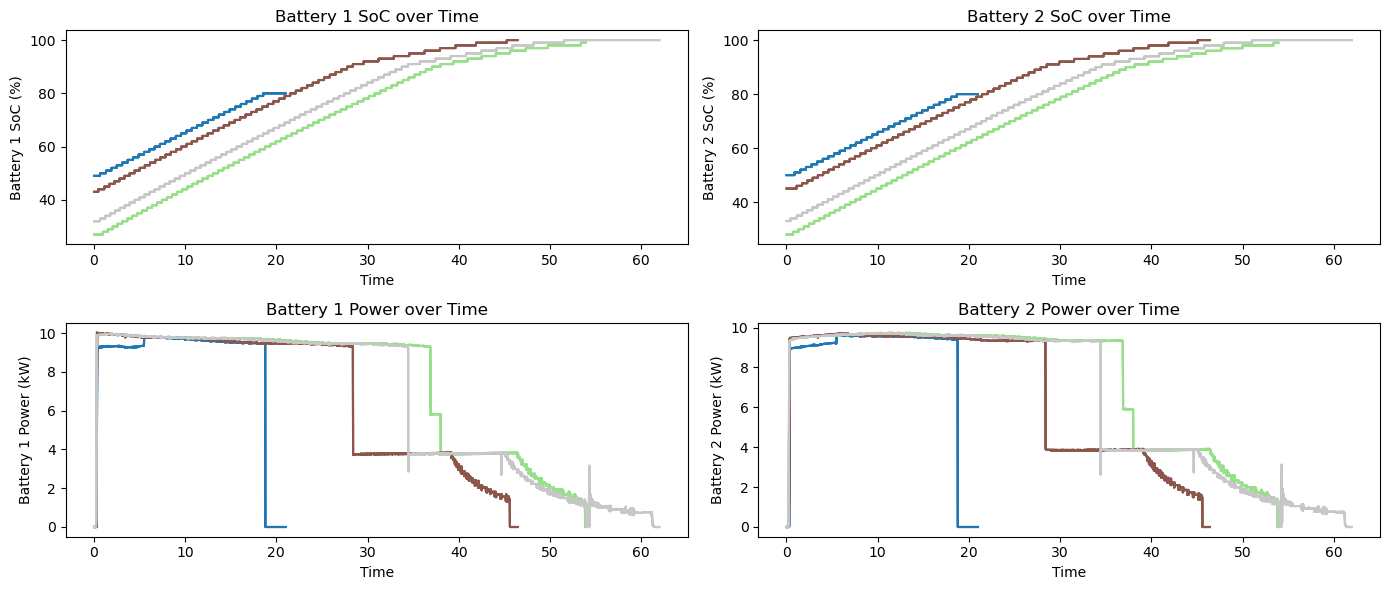

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

for i, subfolder in enumerate(subfolders):
    csv_files = glob.glob(os.path.join(subfolder, '*.csv'))
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush=True)
    
    for csv_file in csv_files:
        axes[0,0].plot(df_power["time"][i], df_power["bat1C"][i], color=colormap(i / total_subfolders))
        axes[0,1].plot(df_power["time"][i], df_power["bat2C"][i], color=colormap(i / total_subfolders))
        axes[1,0].plot(df_power["time"][i], abs(df_power["bat1A"][i]*df_power["bat1V"][i]/1000), color=colormap(i / total_subfolders))
        axes[1,1].plot(df_power["time"][i], abs(df_power["bat2A"][i]*df_power["bat2V"][i]/1000), color=colormap(i / total_subfolders))

axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Battery 1 SoC (%)')
axes[0, 0].set_title('Battery 1 SoC over Time')

axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Battery 2 SoC (%)')
axes[0, 1].set_title('Battery 2 SoC over Time')

axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Battery 1 Power (kW)')
axes[1, 0].set_title('Battery 1 Power over Time')

axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Battery 2 Power (kW)')
axes[1, 1].set_title('Battery 2 Power over Time')


plt.tight_layout()
plt.show()
